## Importing Data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv('Data/Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data = data.apply(pd.to_numeric, errors='coerce')

data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# Checking for null values column wise
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# Data Wrangling

### Making the sales_type column

In [5]:
sales_type = []

for i in data['Sales']:
    if(i>=15):
        sales_type.append('High')
    elif(i<15 and i>=5):
        sales_type.append('Medium')
    else:
        sales_type.append('Low')

In [6]:
sales_type = pd.DataFrame(sales_type, columns = ['Sales Type'])
sales_type

,Sales Type
0,High
1,Medium
2,Medium
3,High
4,Medium
...,...
195,Medium
196,Medium
197,Medium
198,High


### Concatenation

In [7]:
df = [data, sales_type]
data = pd.concat(df, axis = 1)

In [8]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,230.1,37.8,69.2,22.1,High
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,High
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,283.6,42.0,66.2,25.5,High


In [15]:
# To get column names
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales', 'Sales Type'], dtype='object')

In [24]:
# Aggregate (minimum) on each column
data_gb = data.groupby('Sales Type', as_index=False)['TV', 'Radio', 'Newspaper', 'Sales'].min()
data_gb

,Sales Type,TV,Radio,Newspaper,Sales
0,High,93.9,10.6,0.3,15.0
1,Low,0.7,2.1,1.0,1.6
2,Medium,5.4,0.0,0.9,5.3


In [20]:
# Sum of TV, News, Radio
data_sum = data.groupby('Sales Type', as_index=False)['TV', 'Radio', 'Newspaper'].sum()
data_sum

,Sales Type,TV,Radio,Newspaper
0,High,16469.8,2594.1,2720.6
1,Low,13.4,53.3,15.4
2,Medium,12925.3,2005.4,3374.8


In [23]:
data_avg = data.groupby('Sales Type', as_index=False)['TV', 'Radio', 'Newspaper'].mean()
data_avg

,Sales Type,TV,Radio,Newspaper
0,High,213.893506,33.689610,35.332468
1,Low,4.466667,17.766667,5.133333
2,Medium,107.710833,16.711667,28.123333


### Pivoting and Reshaping

In [34]:
import pandas.util.testing as tm; tm.N = 3

def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])

df = unpivot(tm.makeTimeDataFrame())
df

,date,variable,value
0,2000-01-03,A,0.313399
1,2000-01-04,A,-0.354660
2,2000-01-05,A,-0.800380
3,2000-01-03,B,-1.066733
4,2000-01-04,B,-0.350129
5,2000-01-05,B,-0.541114
6,2000-01-03,C,-0.461490
7,2000-01-04,C,-0.301926
8,2000-01-05,C,-0.270558
9,2000-01-03,D,-0.779332


In [35]:
# To select everything belonging to a particular variable
df[df['variable']=='A']

,date,variable,value
0,2000-01-03,A,0.313399
1,2000-01-04,A,-0.354660
2,2000-01-05,A,-0.800380


## What is Pivoting

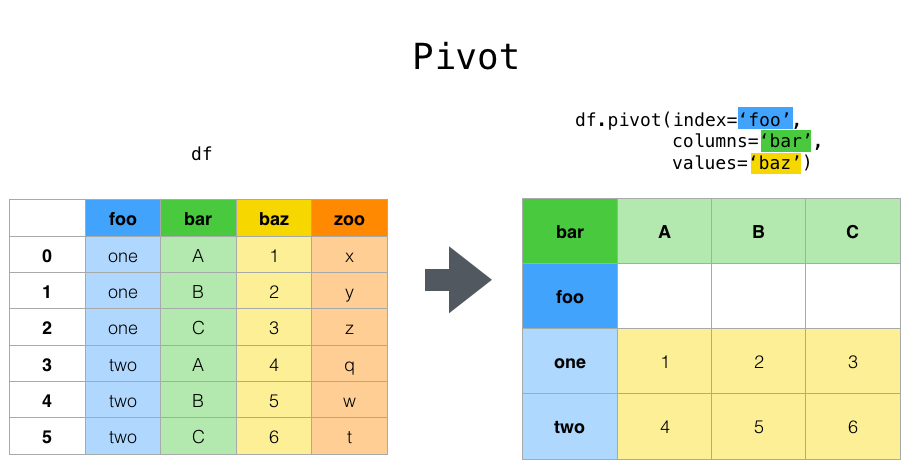

In [36]:
df.pivot(index='date', columns='variable', values='value')

variable,A,B,C,D
date,,,,
2000-01-03,0.313399,-1.066733,-0.461490,-0.779332
2000-01-04,-0.354660,-0.350129,-0.301926,0.444191
2000-01-05,-0.800380,-0.541114,-0.270558,1.414017


If the values argument is omitted, and the input DataFrame has more than one column of values which are not used as column or index inputs to pivot, then the resulting “pivoted” DataFrame will have *hierarchical columns* whose topmost level indicates the respective value column

**Example**

In [37]:
df['value2'] = df['value']*2
df

,date,variable,value,value2
0,2000-01-03,A,0.313399,0.626798
1,2000-01-04,A,-0.354660,-0.709320
2,2000-01-05,A,-0.800380,-1.600761
3,2000-01-03,B,-1.066733,-2.133466
4,2000-01-04,B,-0.350129,-0.700257
5,2000-01-05,B,-0.541114,-1.082227
6,2000-01-03,C,-0.461490,-0.922981
7,2000-01-04,C,-0.301926,-0.603851
8,2000-01-05,C,-0.270558,-0.541115
9,2000-01-03,D,-0.779332,-1.558664


In [39]:
pivoted = df.pivot('date','variable')
pivoted

value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03  0.313399 -1.066733 -0.461490 -0.779332  0.626798 -2.133466   
2000-01-04 -0.354660 -0.350129 -0.301926  0.444191 -0.709320 -0.700257   
2000-01-05 -0.800380 -0.541114 -0.270558  1.414017 -1.600761 -1.082227   

                                
variable           C         D  
date                            
2000-01-03 -0.922981 -1.558664  
2000-01-04 -0.603851  0.888382  
2000-01-05 -0.541115  2.828033

# Data Modeling

In [93]:
# Importing the data fresh :)
data_new = pd.read_csv('Data/Advertising.csv')
data_new

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [94]:
for i in range(5, len(data_new['TV']), 6):
    data_new['TV'][i] = np.nan

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
data_new['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197      NaN
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [96]:
for i in range(9, len(data_new['Newspaper']), 10):
    data_new['Newspaper'][i] = np.nan

C:\Users\varun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
data_new['Newspaper']

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     NaN
Name: Newspaper, Length: 200, dtype: float64

In [98]:
data_new

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,NaN,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### For printing only non-null values

In [99]:
# Checking null values in TV column
not_null = pd.isnull(data_new['TV'])

In [101]:
# Updating the dataframe for only non-null values
data_new_NN = data_new[not_null==0]
data_new_NN

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
198,199,283.6,42.0,66.2,25.5


In [103]:
# Checking null values in Newspaper column
not_null = pd.isnull(data_new_NN['Newspaper'])

In [104]:
data_new_NN = data_new_NN[not_null==0]
data_new_NN

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7


In [108]:
# Checking if all the null values are removed
data_new_NN.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Filling the null values (in original DF)

In [111]:
# Replacing with zero
data_0 = data_new.replace(np.nan, 0)
data_0

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,0.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [118]:
# Replacing with average of a column
data_1 = data_new.replace(np.nan, data_new['Newspaper'].mean())
data_1

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100000,37.8,69.200000,22.1
1,2,44.500000,39.3,45.100000,10.4
2,3,17.200000,45.9,69.300000,9.3
3,4,151.500000,41.3,58.500000,18.5
4,5,180.800000,10.8,58.400000,12.9
...,...,...,...,...,...
195,196,38.200000,3.7,13.800000,7.6
196,197,94.200000,4.9,8.100000,9.7
197,198,31.222778,9.3,6.400000,12.8
198,199,283.600000,42.0,66.200000,25.5


In [119]:
data_0.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

**I'll be working with *data_0* for training the model**
### Normalization

In [135]:
# Working on 3 Colums as feature - TV, Radio, Newspaper
x = data_0.iloc[:,1:4].values
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  0. ,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,   0. ],
       [ 66.1,   5.8,  24.2],
       [  0. ,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [  0. ,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,   0. ],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [  0. ,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [  0. ,  16. ,   0. ],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [136]:
# Normalizing the data
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2
0,0.783719,0.762097,0.607018
1,0.151567,0.792339,0.395614
2,0.058583,0.925403,0.607895
3,0.516008,0.832661,0.513158
4,0.615804,0.217742,0.512281
...,...,...,...
195,0.130109,0.074597,0.121053
196,0.320845,0.098790,0.071053
197,0.000000,0.187500,0.056140
198,0.965940,0.846774,0.580702


In [138]:
# Initializing X, Y
X = df.iloc[:,:]
Y = data_0['Sales']

In [139]:
X

,0,1,2
0,0.783719,0.762097,0.607018
1,0.151567,0.792339,0.395614
2,0.058583,0.925403,0.607895
3,0.516008,0.832661,0.513158
4,0.615804,0.217742,0.512281
...,...,...,...
195,0.130109,0.074597,0.121053
196,0.320845,0.098790,0.071053
197,0.000000,0.187500,0.056140
198,0.965940,0.846774,0.580702


In [140]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

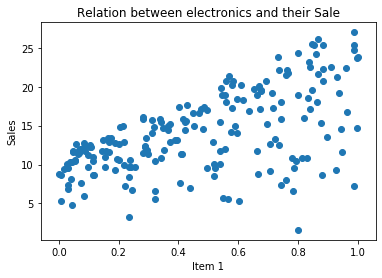

In [163]:
# Scatter Plot
attr = 1
plt.scatter(X[attr], Y)
plt.title('Relation between electronics and their Sale')
plt.xlabel(f"Item {attr}")
plt.ylabel('Sales')
plt.show()

In [225]:
# Dividing the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)

In [226]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = Y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = Y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")
assert (X_train.shape[0]==Y_train.shape[0] and X_test.shape[0]==Y_test.shape[0]), "Check your splitting carefully"

X_train: (120, 3) , y_train: (120,)
X_test: (80, 3) , y_test: (80,)


In [227]:
# Initializing the model
linear_regression = LinearRegression()

In [228]:
# Fitting the model on the train data
linear_regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
# Calculating the mean squared error
mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

print(f"\nMSE: {mse}")


MSE: 10.07328748777973


In [235]:
# Prediction
linear_regression.predict(X_test)

array([14.97355583, 23.52749176,  9.8913678 , 14.05969487, 17.9050151 ,
       10.9473205 , 13.97820595, 19.26616169, 14.39929392,  7.64633578,
       11.80673376, 11.58402567, 16.16880725, 11.72086754, 10.42890554,
        6.84175484,  6.01698159, 14.47400749, 10.48384936, 15.01828895,
       18.55682601,  6.65355502, 12.87679032, 20.46814333, 13.72618916,
       20.52586481, 10.86036464, 12.57585017, 17.56557129, 14.7140373 ,
       12.8950075 , 13.18258516,  8.57087327, 21.68041272, 16.6965261 ,
       16.84645409,  5.53371573,  8.75063706, 23.18757971, 16.29701822,
       20.63027401, 11.39340028,  9.30613411, 13.56923783, 12.87791378,
       12.88499758, 21.03191625,  7.96878365,  8.17742242,  9.09458061,
       13.39164549, 12.90438569,  7.19169707, 21.41451874, 16.98108555,
       11.59165592, 12.84187786,  6.91044758, 19.68650187, 13.40856847,
       19.19698186,  8.39037543, 13.81917717, 13.78647659, 12.3109852 ,
       15.0861328 , 15.40028589, 10.2996959 , 13.96003431,  9.54

In [234]:
# Accuracy
linear_regression.score(X_train, Y_train)

0.6492419653758632

### Making the learning curve
A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. Consider the following example where we plot the learning curve of a naive Bayes classifier and an SVM.

In [254]:
from sklearn.model_selection import learning_curve

train_sizes = [1, 80, 120]
train_sizes, train_scores, validation_scores = learning_curve(estimator = linear_regression, 
                                                              X = df.iloc[:,:], 
                                                              y = data_0['Sales'], 
                                                              train_sizes = train_sizes, 
                                                              cv = None, 
                                                              scoring = 'neg_mean_squared_error')

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [255]:
train_sizes

array([  1,  80, 120])

In [256]:
train_scores

array([[ -0.        ,  -0.        ,  -0.        ],
       [ -9.63979518, -11.00362391,  -9.91114394],
       [ -9.20098465,  -9.93974314,  -8.96106246]])

In [258]:
validation_scores

array([[-29.51208955, -96.60074627, -95.62818182],
       [-13.03700656, -11.11383525, -10.08028946],
       [-12.21898553, -10.71065542,  -8.88496808]])

To plot the learning curves, we need only a single error score per training set size. For this reason, in the next code cell we take the mean value of each row and also flip the signs of the error scores.

In [260]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean()
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
80     10.184854
120     9.367263
dtype: float64

 --------------------

Mean validation scores

 1      31.976306
80     31.976306
120    31.976306
dtype: float64
